## ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Convolutional Neural Networks



**By the end of the lesson, you should be able to:**
- Identify use cases for convolutional neural networks and when they are superior to other neural networks.
- Understand how edge detection works in CNNs.
- Describe convolutional and pooling layers.
- Define padding, stride, and filters.

Convolutional neural networks are generally used when we are dealing with image data.

Their main advantage over densely connected neural networks is **efficiency**.

In order to illustrate this, let's build out a feedforward neural network and tackle the MNIST Handwritten Digits Dataset.

In [1]:
# Import libraries and modules
import numpy as np
import matplotlib.pyplot as plt

# For reproducibility
np.random.seed(42)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
 
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

%matplotlib inline

Using TensorFlow backend.


In [2]:
# Check one value of X_train.
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [3]:
# Check shape of an image.
X_train[0].shape

(28, 28)

##### We want to scale our data to be betwen 0 and 1.

When working with image data, we commonly scale it to be between 0 and 1. This is a common choice if we are pulling images from various sources that are on a different scale, and can improve speed by keeping values close to 0. Depending on the type of computation you want to do, having pixel values represented with `255` might not be ideal.

In [4]:
# Make sure each value is a float. (Otherwise, we get an error.)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# The current range of X_train and X_test is 0 to 255.
# The code below is equivalent to X_train = X_train / 255.
# This scales each value to be between 0 and 1.
X_train /= 255
X_test /= 255

<img src="./images/picture.png" alt="drawing" width="400"/>

In [5]:
# Check shape of full training data.
X_train.shape

(60000, 28, 28)

##### We want to reshape each image to be 28 x 28 x 1.

This allows our neural network to know that there's only one value (how dark the pixel is) instead of multiple values per pixel. For example, a color image stored in RGB (red/green/blue) might have shape 28 x 28 x 3, where one value is corresponds to how red the pixel is, one value corresponds to how blue the pixel is, and one value corresponds to how green the pixel is.
- Reshaping your images can be a hard part of pre-processing.

In [6]:
# Reshape each image to be 28 x 28 x 1.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Now let's check out `y_train`.

In [7]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

<details><summary>What change do I need to make to y_train? Why?</summary>

- Right now, the values of `y_train` will be interpreted as a number. Our neural network would try to predict values that are numerically close to the true value. (i.e. If $Y = 5$, then $\hat{Y} = 4$ would be way better than $\hat{Y} = 1$. **This isn't actually what we want!**
- I need to convert it to a categorical variable.
</details>

In [8]:
# Change y_train.
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Check y_train.
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Let's fit a feedforward neural network to this data.

In [10]:
# When instantiating our model, what do we first write?

model = Sequential()

<img src="./images/flattening_image.png" alt="drawing" width="500"/>

In [11]:
# In order to "align" our neurons in a vertical array, we
# add a "Flatten" layer. This will be required before adding
# subsequent Dense layers.

model.add(Flatten())

<img src="./images/picture.png" alt="drawing" width="400"/>

<img src="./images/network.png" alt="drawing" width="400"/>

In [12]:
# Let's define our next layer to be densely connected to 
# a layer of 128 neurons. We need to specify the input shape.
# Use the ReLU activation function.

model.add(Dense(128, input_shape=(28, 28), activation='relu'))

In [13]:
# Let's define our next layer to be densely connected to 
# a layer of 32 neurons. Use the ReLU activation function.

model.add(Dense(32, activation='relu'))

In [14]:
# Let's now end our network by densely connecting this layer.

model.add(Dense(10, activation='softmax'))

In [15]:
# Compile model.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
# Fit model on training data.
history = model.fit(X_train,
                    y_train, 
                    batch_size=256,
                    validation_data=(X_test, y_test),
                    epochs=5,
                    verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.4616 - acc: 0.8698 - val_loss: 0.2174 - val_acc: 0.9370
Epoch 2/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.1809 - acc: 0.9472 - val_loss: 0.1449 - val_acc: 0.9581
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.1297 - acc: 0.9626 - val_loss: 0.1238 - val_acc: 0.9632
Epoch 4/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.1019 - acc: 0.9698 - val_loss: 0.1065 - val_acc: 0.9683
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0830 - acc: 0.9756 - val_loss: 0.1110 - val_acc: 0.9664


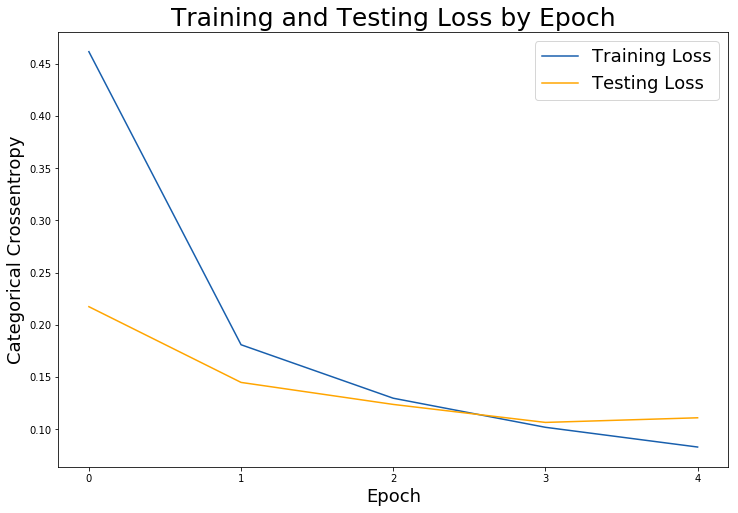

In [17]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4])

plt.legend(fontsize = 18);

<details><summary>If my model is underfit, what might I do?</summary>

- I could try decreasing the batch size.
- I could try increasing the number of epochs.
- I could try increasing the number of layers.
- I could try increasing the number of nodes in each layer.
</details>

In [18]:
# Evaluate model on test data.
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

labels = model.metrics_names

10000/10000 [==============================] - 0s 33us/step


In [19]:
# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

loss: 0.1109730645891279
acc: 0.9664


<details><summary>How many parameters are being fit in this model?</summary>

- In our input layer, we have $28 * 28 = 784$ neurons.
- In our first hidden layer, we have $64$ neurons.
- In our second hidden layer, we have $32$ neurons.
- In our output layer, we have $10$ neurons.
- There is one bias value for each neuron in every hidden layer and output layer, which is $128 + 32 + 10 = 170$ bias parameters.
- There is one weight value connecting each node from the input to first hidden layer, which is $784 * 128 = 100,352$ weight parameters.
- There is one weight value connecting each node from the first hidden layer to the second hidden layer, which is $128 * 32 = 4,096$ weight parameters.
- There is one weight value connecting each node from the second hidden layer to the output layer, which is $32 * 10 = 320$ weight parameters.
- Adding these up, we get $170 + 100,352 + 4,096 + 320 \approx 105,000$ parameters.
</details>

In [20]:
# Check out the model summary.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


<details><summary>What are some consequences of fitting a model with too many parameters?</summary>

- Easy to overfit our model.
- Learning is quite slow.
- We need more data in order to meaningfully learn and fit a model!
</details>

## Convolutional Neural Networks
Convolutional neural networks are a great way to get around this issue of too many parameters. CNNs do some complicated math up front to "compress our images," allowing us to learn far fewer parameters in later layers.

A CNN will generally consist of three types of layers:
- Convolutional Layer
- Pooling Layer
- Densely Connected Layer

If you look CNNs up, you probably find something like this:
<img src="./images/cnn.png" alt="drawing" width="400"/>

This isn't overly helpful if we're trying to learn what CNNs are/do.

### Let's fit a convolutional neural network to this data.

In [21]:
# Instantiate a CNN.
cnn_model = Sequential()

In [22]:
# Add a convolutional layer.

cnn_model.add(Conv2D(filters = 6,            # number of filters
                     kernel_size = 3,        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(28,28,1))) # shape of input (image)

We have to specify the input shape in our first cell, just like we had to do earlier!

In [23]:
cnn_model.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

In [24]:
cnn_model.add(Conv2D(16,
                     kernel_size=3,
                     activation='relu'))

In [25]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
cnn_model.add(Flatten())

<img src="./images/pic1.png" alt="drawing" width="400"/>

<img src="./images/pic2.png" alt="drawing" width="400"/>

<img src="./images/pic3.png" alt="drawing" width="400"/>

<img src="./images/pic4.png" alt="drawing" width="400"/>

In [27]:
# Add a densely-connected layer with 128 neurons.
cnn_model.add(Dense(128, activation='relu'))

In [28]:
# Add a final layer with 10 neurons.
cnn_model.add(Dense(10, activation='softmax'))

In [29]:
# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [30]:
# Fit model on training data
history = cnn_model.fit(X_train,
                        y_train,
                        batch_size=256,
                        validation_data=(X_test, y_test),
                        epochs=5,
                        verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 17s 277us/step - loss: 0.5184 - acc: 0.8591 - val_loss: 0.1559 - val_acc: 0.9536
Epoch 2/5
60000/60000 [==============================] - 15s 253us/step - loss: 0.1227 - acc: 0.9629 - val_loss: 0.0847 - val_acc: 0.9742
Epoch 3/5
60000/60000 [==============================] - 15s 245us/step - loss: 0.0840 - acc: 0.9749 - val_loss: 0.0744 - val_acc: 0.9749
Epoch 4/5
60000/60000 [==============================] - 15s 248us/step - loss: 0.0698 - acc: 0.9787 - val_loss: 0.0608 - val_acc: 0.9801
Epoch 5/5
60000/60000 [==============================] - 16s 266us/step - loss: 0.0586 - acc: 0.9826 - val_loss: 0.0552 - val_acc: 0.9817


In [31]:
# Check out the model summary.
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total para

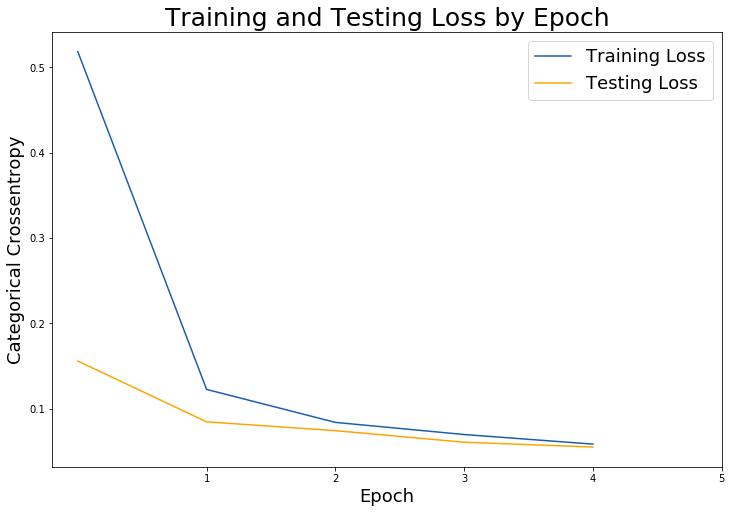

In [32]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4])

plt.legend(fontsize = 18);

In [33]:
# Evaluate model on test data.
cnn_score = cnn_model.evaluate(X_test,
                               y_test,
                               verbose=1)

cnn_labels = cnn_model.metrics_names

10000/10000 [==============================] - 1s 127us/step


In [34]:
# Compare CNN and FFNN models.
print(f'CNN {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

CNN loss  : 0.05518140316363424
CNN acc   : 0.9817

FFNN loss : 0.1109730645891279
FFNN acc  : 0.9664


### Convolution Layer

The convolution layer is where we pass a filter over an image and do some calculation at each step. Specifically, we take pixels that are close to one another, then summarize them with one number. The goal of the convolution layer is to identify important features in our images, like edges.
- Let's head to the slides to see this in action.

Our hyperparameters here are:
- the number of filters to use. This is given by `filters = 6` in our example: six filters.
- the dimensions of the filter. This is given by `kernel_size = 3` in our example: a 3x3 filter.

#### Padding

When we pass a filter over an image, each of the "inside" pixels is counted pretty frequently and thus gets "represented" more in the final model output.

---

<details><summary>How many times does each corner get included in the "output?"</summary>

- Right now, each corner gets included only once.
</details>

We can use **padding** to add a border of white cells around the edge of the image. This will allow pixels on the edge/in the corner to be included more frequently. (This might be good when doing computer vision for self-driving vehicles!)

---

<details><summary>In this MNIST digits case, do you think padding is a good idea or a bad idea?</summary>

- Padding is probably a bad idea here. It's unlikely that we're getting important data from the corners/edges of the image and by adding padding, we're increasing the number of parameters nee
</details>

[Let's visualize what the convolution operation looks like](https://ezyang.github.io/convolution-visualizer/).

### Pooling Layer

Remember that CNNs learn far fewer parameters than a regular feed-forward neural network. Most of the "parameter reduction" comes from the pooling layer.

<img src="./images/maxpool.png" alt="drawing" width="400"/>

In Max Pooling, we pass a filter over an image. At each step, we take the maximum value and record it as part of the output.
- Average Pooling exists, but is far less frequently used. [Andrew Ng](https://www.deeplearning.ai/deep-learning-specialization/) recommends using Max Pooling.
- When pooling, we generally partition the result from the previous layer. That is, the filter does not usually overlap like it does in the convolutional layer.

Our hyperparameters here are the **dimensions of the filter we use when pooling**. This is given by `pool_size = (2, 2)` in our example.

### Densely-Connected Layer
The densely-connected layer is the exact same as in a normal feed-forward neural network, so we won't spend any time talking about that. **Except: remember to pass a `Flatten()` layer before a `Dense()` layer!**

In [35]:
# Instantiate a CNN.
cnn_model_2 = Sequential()

# Add a convolutional layer.
cnn_model_2.add(Conv2D(filters = 16,         # number of filters
                     kernel_size = 3,        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(28,28,1))) # shape of input (image)

# Add a pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer.
cnn_model_2.add(Conv2D(64,
                       kernel_size = 3,
                       activation='relu'))

# Add another pooling layer.
cnn_model_2.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the "box" to the vertical line of nodes!
cnn_model_2.add(Flatten())

# Add a densely-connected layer with 64 neurons.
cnn_model_2.add(Dense(64, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_2.add(Dropout(0.5))

# Add a densely-connected layer with 32 neurons.
cnn_model_2.add(Dense(32, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_2.add(Dropout(0.5))

# Add a final layer with 10 neurons.
cnn_model_2.add(Dense(10, activation='softmax'))

# Compile model
cnn_model_2.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Fit model on training data
history = cnn_model_2.fit(X_train,
                          y_train,
                          batch_size=128,
                          validation_data=(X_test, y_test),
                          epochs=5,
                          verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 355us/step - loss: 0.8682 - acc: 0.7048 - val_loss: 0.1310 - val_acc: 0.9662
Epoch 2/5
60000/60000 [==============================] - 18s 307us/step - loss: 0.3866 - acc: 0.8787 - val_loss: 0.0747 - val_acc: 0.9787
Epoch 3/5
60000/60000 [==============================] - 18s 297us/step - loss: 0.2969 - acc: 0.9084 - val_loss: 0.0569 - val_acc: 0.9835
Epoch 4/5
60000/60000 [==============================] - 18s 294us/step - loss: 0.2538 - acc: 0.9215 - val_loss: 0.0553 - val_acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 17s 285us/step - loss: 0.2262 - acc: 0.9310 - val_loss: 0.0496 - val_acc: 0.9864


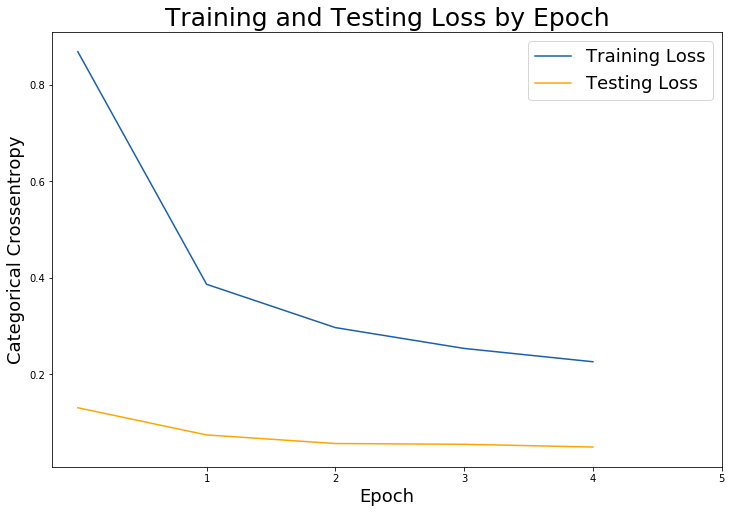

In [36]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4])

plt.legend(fontsize = 18);

In [37]:
# Evaluate model on test data.
cnn_2_score = cnn_model_2.evaluate(X_test,
                                   y_test,
                                   verbose=1)

cnn_2_labels = cnn_model_2.metrics_names

# Compare models.
print(f'CNN 2 {cnn_2_labels[0]}  : {cnn_2_score[0]}')
print(f'CNN 2 {cnn_2_labels[1]}   : {cnn_2_score[1]}')
print()
print(f'CNN 1 {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

cnn_model_2.summary()

10000/10000 [==============================] - 1s 106us/step
CNN 2 loss  : 0.04963143759612367
CNN 2 acc   : 0.9864

CNN 1 loss  : 0.05518140316363424
CNN 1 acc   : 0.9817

FFNN loss : 0.1109730645891279
FFNN acc  : 0.9664
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
___________________________________________________

## Conclusion

Convolutional neural networks are uniquely suited to tackle image data.
- Dealing with images usually presents high-dimensional challenges. (A 28x28 image is a pretty low-resolution image.)

<details><summary>Why are convolutional neural networks better equipped to handle image data than non-CNNs?
</summary>

- CNNs are naturally set up to consider interactions among "close pixels" only and drastically cuts down the number of parameters needed to learn.
</details>

<details><summary>Can you think of other situations (i.e. not images) in which we might apply a convolutional neural network?</summary>

- **Videos**. A video is really just a sequence of pictures, so we might use a convolutional neural network to.
- **Time series data**. Rather than passing a filter over neighboring pixels in pictures, what if we passed a filter over neighboring time periods in time series data?
- **Natural language data**. Rather than passing a filter over neighboring pixels in pictures, what if we passed a filter over neighboring words or tokens in natural language data?
- Convolutional neural networks exploit the inherent structure in data we pass in.
</details>

### (BONUS) Run for more epochs!

In [38]:
# Instantiate a CNN.
cnn_model_3 = Sequential()

# Add a convolutional layer.
cnn_model_3.add(Conv2D(filters = 16,         # number of filters
                     kernel_size = 3,        # height/width of filter
                     activation='relu',      # activation function 
                     input_shape=(28,28,1))) # shape of input (image)

# Add a pooling layer.
cnn_model_3.add(MaxPooling2D(pool_size=(2,2))) # dimensions of region of pooling

# Add another convolutional layer.
cnn_model_3.add(Conv2D(64,
                     kernel_size = 3,
                     activation='relu'))

# Add another pooling layer.
cnn_model_3.add(MaxPooling2D(pool_size=(2,2)))

# We have to remember to flatten to go from the "box" to the vertical line of nodes!
cnn_model_3.add(Flatten())

# Add a densely-connected layer with 64 neurons.
cnn_model_3.add(Dense(64, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_3.add(Dropout(0.5))

# Add a densely-connected layer with 32 neurons.
cnn_model_3.add(Dense(32, activation='relu'))

# Let's try to avoid overfitting!
cnn_model_3.add(Dropout(0.5))

# Add a final layer with 10 neurons.
cnn_model_3.add(Dense(10, activation='softmax'))

# Compile model
cnn_model_3.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

# Fit model on training data
history = cnn_model_3.fit(X_train,
                          y_train,
                          batch_size=128,
                          validation_data=(X_test, y_test),
                          epochs=10,
                          verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.8677 - acc: 0.7056 - val_loss: 0.1077 - val_acc: 0.9713
Epoch 2/10
60000/60000 [==============================] - 18s 305us/step - loss: 0.3605 - acc: 0.8908 - val_loss: 0.0756 - val_acc: 0.9782
Epoch 3/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.2834 - acc: 0.9155 - val_loss: 0.0612 - val_acc: 0.9829
Epoch 4/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.2413 - acc: 0.9279 - val_loss: 0.0508 - val_acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 19s 313us/step - loss: 0.2134 - acc: 0.9355 - val_loss: 0.0451 - val_acc: 0.9878
Epoch 6/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.1981 - acc: 0.9400 - val_loss: 0.0551 - val_acc: 0.9854
Epoch 7/10
60000/60000 [==============================] - 18s 304us/step - loss: 0.1837 - acc: 0.9448 - val_loss: 0.

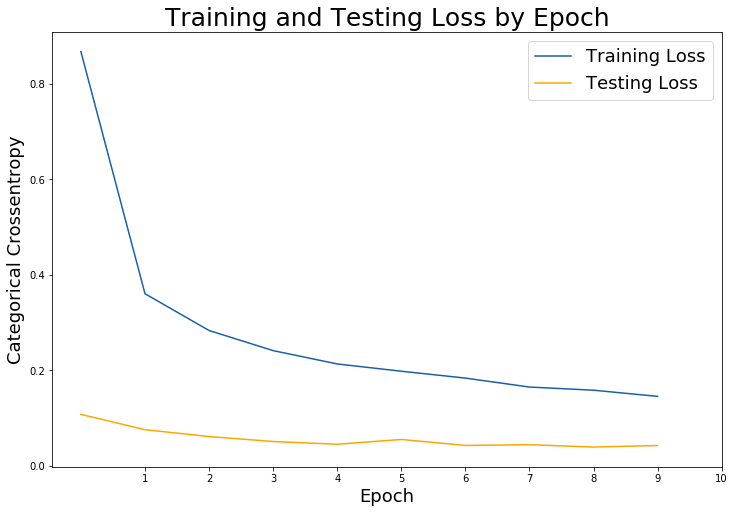

In [39]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

plt.legend(fontsize = 18);

In [40]:
# Evaluate model on test data.
cnn_3_score = cnn_model_3.evaluate(X_test,
                                   y_test,
                                   verbose=1)

cnn_3_labels = cnn_model_3.metrics_names

# Compare models.
print(f'CNN 3 {cnn_3_labels[0]}  : {cnn_3_score[0]}')
print(f'CNN 3 {cnn_3_labels[1]}   : {cnn_3_score[1]}')
print()
print(f'CNN 2 {cnn_2_labels[0]}  : {cnn_2_score[0]}')
print(f'CNN 2 {cnn_2_labels[1]}   : {cnn_2_score[1]}')
print()
print(f'CNN 1 {cnn_labels[0]}  : {cnn_score[0]}')
print(f'CNN 1 {cnn_labels[1]}   : {cnn_score[1]}')
print()
print(f'FFNN {labels[0]} : {score[0]}')
print(f'FFNN {labels[1]}  : {score[1]}')

10000/10000 [==============================] - 1s 107us/step
CNN 3 loss  : 0.042429288164449554
CNN 3 acc   : 0.9895

CNN 2 loss  : 0.04963143759612367
CNN 2 acc   : 0.9864

CNN 1 loss  : 0.05518140316363424
CNN 1 acc   : 0.9817

FFNN loss : 0.1109730645891279
FFNN acc  : 0.9664
